In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("dataset_penduduk_bersih.csv")

# Tampilkan data
df


,Tahun,Jumlah_Penduduk
0,2010,3205121
1,2011,3272828
2,2012,3339684
3,2013,3405475
4,2014,3470393
5,2015,3534114
6,2016,3596623
7,2017,3657601
8,2018,3717291
9,2019,3775279


In [2]:
# Hitung selisih (delta) setiap tahun
df['Perubahan'] = df['Jumlah_Penduduk'].diff()

# Hapus nilai NaN pertama
df_changes = df.dropna()

df_changes


,Tahun,Jumlah_Penduduk,Perubahan
1,2011,3272828,67707.0
2,2012,3339684,66856.0
3,2013,3405475,65791.0
4,2014,3470393,64918.0
5,2015,3534114,63721.0
6,2016,3596623,62509.0
7,2017,3657601,60978.0
8,2018,3717291,59690.0
9,2019,3775279,57988.0
10,2020,3623790,-151489.0


In [3]:
# Hitung frekuensi perubahan
frekuensi = df_changes['Perubahan'].value_counts()

# Probabilitas tiap perubahan
probabilitas = frekuensi / len(df_changes)

probabilitas


Perubahan
 67707.0     0.071429
 66856.0     0.071429
 65791.0     0.071429
 64918.0     0.071429
 63721.0     0.071429
 62509.0     0.071429
 60978.0     0.071429
 59690.0     0.071429
 57988.0     0.071429
-151489.0    0.071429
 28608.0     0.071429
 34853.0     0.071429
 33860.0     0.071429
 32005.0     0.071429
Name: count, dtype: float64

In [4]:
# Ambil nilai perubahan & probabilitas
nilai_perubahan = probabilitas.index.values
nilai_peluang   = probabilitas.values

# Jumlah simulasi
simulasi = 1000

hasil_simulasi = np.random.choice(nilai_perubahan, size=simulasi, p=nilai_peluang)

hasil_simulasi[:20]  # Tampilkan 20 hasil awal


array([  32005., -151489.,   34853.,   32005.,   65791.,   33860.,
         65791.,   57988.,   66856.,   62509.,   57988.,   57988.,
         65791.,   65791.,   67707.,   64918.,   67707., -151489.,
       -151489.,   57988.])

In [5]:
tahun_awal = df['Tahun'].max()
penduduk_awal = df['Jumlah_Penduduk'].iloc[-1]

prediksi_tahun = []
prediksi_jumlah = []

current_pop = penduduk_awal

for i in range(1, 6):  # prediksi 5 tahun
    perubahan = np.random.choice(nilai_perubahan, p=nilai_peluang)
    current_pop += perubahan
    
    prediksi_tahun.append(tahun_awal + i)
    prediksi_jumlah.append(current_pop)

# Buat tabel hasil prediksi
df_prediksi = pd.DataFrame({
    "Tahun": prediksi_tahun,
    "Prediksi_Penduduk": prediksi_jumlah
})

df_prediksi


,Tahun,Prediksi_Penduduk
0,2025,3781724.0
1,2026,3844233.0
2,2027,3872841.0
3,2028,3935350.0
4,2029,3970203.0


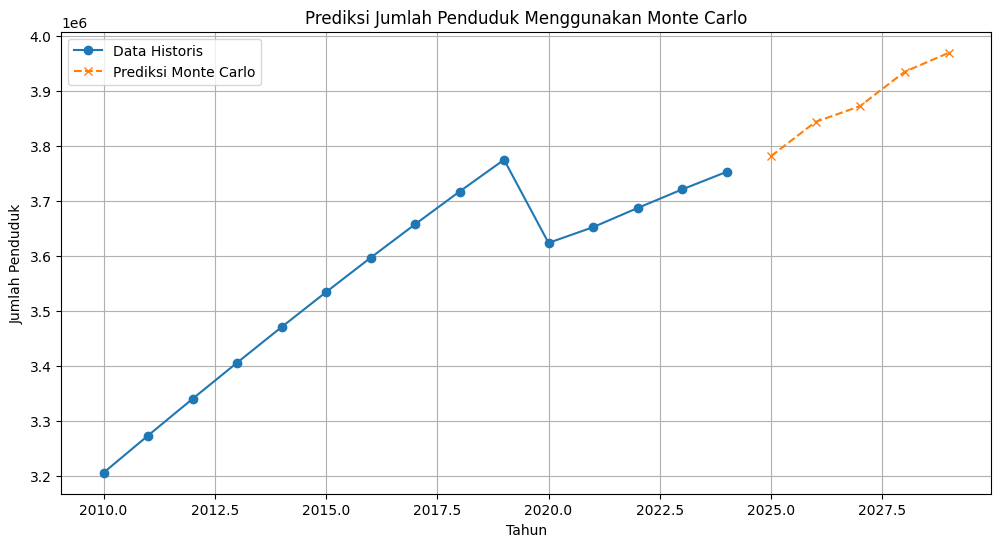

In [6]:
plt.figure(figsize=(12,6))

# Grafik data historis
plt.plot(df['Tahun'], df['Jumlah_Penduduk'], marker='o', label='Data Historis')

# Grafik prediksi
plt.plot(df_prediksi['Tahun'], df_prediksi['Prediksi_Penduduk'], marker='x', linestyle='--', label='Prediksi Monte Carlo')

plt.title("Prediksi Jumlah Penduduk Menggunakan Monte Carlo")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penduduk")
plt.grid(True)
plt.legend()
plt.show()
